## Abstract

When we use Student's T-test for samples from other than normal distributions or use the classic formula for Mean Confidence Interval -> we assume that sample means distributed normally if we have enough sample size. Let's research that aspect in practice

## Check function 

#### check_for_ttest_applicability

Function checks if means are distributed normally and it's correct to use Student's test.

1. **Generate sample** from the given distribution. Use distribution classes from *scipy. stats. <distr()>* example -> scipy.stats.expon()
    - We can use different sample sizes to understand when it's enough for the central limit theorem to kick in. 
2. **Use Monte-Carlo method** to estimate means distribution. -> repeating sampling N times (better 10k+)
3. **Check if it's normal enough** to use Student's test. 
     - There are plenty of methods to check normality, but we will use the practical one. In most analytical cases we want means distributed normally to use T-test. So, we will estimate the False Positive Rate as the main metric. If everything is correct - FPR should be roughly the same as alpha.  

In [26]:
import scipy.stats as sps
import seaborn as sns
import numpy as np

from statsmodels.stats.proportion import proportion_confint

In [27]:
def check_for_ttest_applicability(distribution, sample_size, iters=int(1e4)):
    """Simple AA test MonteCarlo with Students Test"""
    # Generate samples
    control = distribution.rvs([iters, sample_size])
    test = distribution.rvs([iters, sample_size])
    control_sample_means = np.mean(control, axis=1)
    
    # FPR for t test check
    false_positives= np.sum(sps.ttest_ind(test, control, axis=1).pvalue <= 0.05)
    false_positive_rate = false_positives / iters
    ci_fpr = proportion_confint(false_positives, nobs=iters, method='wilson')
    
    # Results: 
    print(f"\n\nFalse Positive Rate for T-test = {false_positive_rate}, with CI {ci_fpr}\n\n")
    sns.displot(data=control[0])
    sns.displot(control_sample_means, color='orange') 

## Exponential distribution

[Exponential Wiki](https://en.wikipedia.org/wiki/Exponential_distribution)

In life it commonly represents some revenue per user metrics, when most of our users have small payments, but there is a long tail of other clusters that have bigger payments.



False Positive Rate for T-test = 0.0477, with CI (0.0436935891355785, 0.052053775790535536)




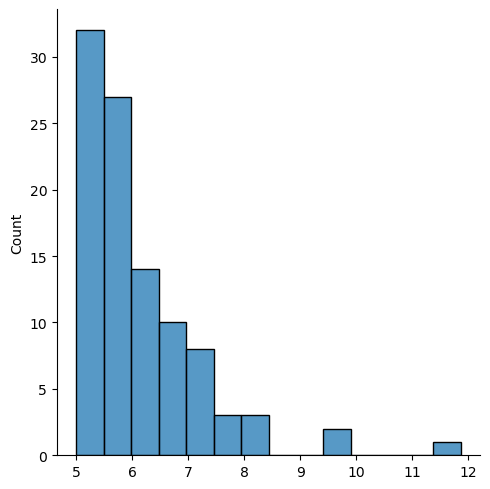

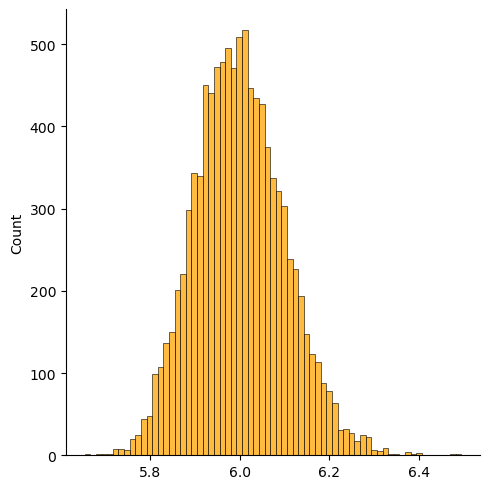

In [28]:
distribution, sample_size = sps.expon(5), 100

check_for_ttest_applicability(distribution, sample_size)

## Poisson distribution

[Poisson Wiki](https://en.wikipedia.org/wiki/Poisson_distribution)

>  expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event



False Positive Rate for T-test = 0.0486, with CI (0.04455606550831664, 0.05299060822073017)




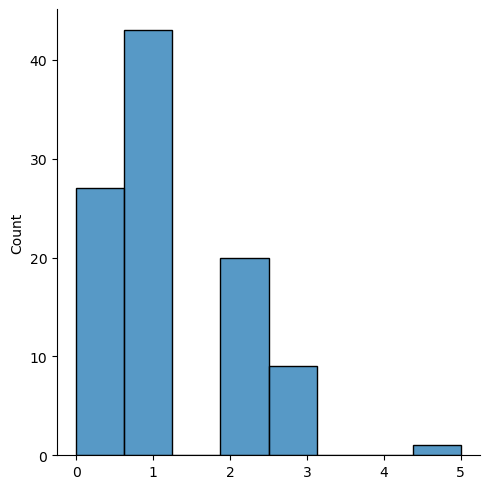

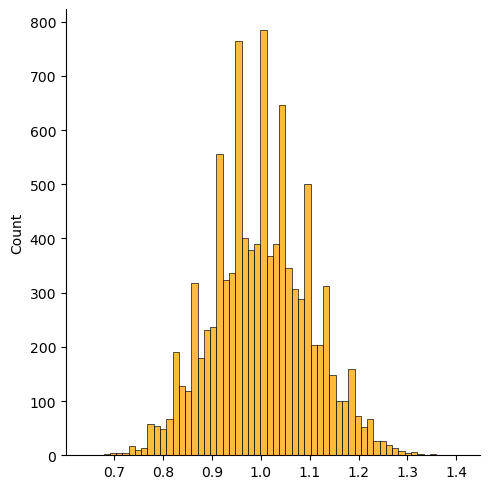

In [29]:
distribution, sample_size = sps.poisson(1), 100

check_for_ttest_applicability(distribution, sample_size)